In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("../datasets/word2vec/embedding/wikipedia_color_names.csv")

In [4]:
data.head()

,Name,Hex (24 bit),Red (8 bit),Green (8 bit),Blue (8 bit),Hue (degrees),HSL.S (%),"HSL.L (%), HSV.S (%), HSV.V (%)"
0,Absolute zero,#0048BA,0,72,186,217.0,100.0,37.0
1,Acid green,#B0BF1A,176,191,26,65.0,76.0,43.0
2,Aero,#7CB9E8,124,185,232,206.0,70.0,70.0
3,Aero blue,#C9FFE5,201,255,229,151.0,100.0,89.0
4,African violet,#B284BE,178,132,190,288.0,31.0,63.0


In [14]:
X, y = data.iloc[:, 2:5].values, data.iloc[:, 0].values

In [36]:
color = X[y == "Pink"]

In [37]:
distances = np.sum((X - color) ** 2, axis=1)

In [38]:
near = distances.argsort()[:10]

In [39]:
y[near]

array(['Pink', 'Bubble gum', 'Cherry blossom pink', 'Orchid pink',
       'Light pink', 'Baby pink', 'Tea rose', 'Cotton candy',
       'Spanish pink', 'Cameo pink'], dtype=object)

In [40]:
colors_rgb = X[near]

In [41]:
colors_rgb.shape

(10, 3)

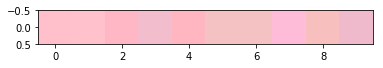

In [44]:
plt.imshow(colors_rgb.reshape(1, -1, 3))